# Loading the data

In [41]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.cloud import bigquery     # If you are working locally, make sure you have Google Cloud library installed
import pandas as pd
from google.oauth2 import service_account


import pyarrow.parquet as pq

In [3]:
# Connect to BQ


credentials = service_account.Credentials.from_service_account_file(
'/Users/mariegeorgescudehillerin/Desktop/Le Wagon/Project/music-recommendation-system-24-e7b0bc87bbb3.json')
# music-recommendation-system-24-3d0d21fb1f8b.json is the service account JSON file. Save the file locally on your device and add the path here.
# make sure that the slashes in the path are '/' and not '\'


project_id = 'music-recommendation-system-24'
client = bigquery.Client(credentials= credentials,project=project_id)

In [4]:
# Query BQ


query_job = client.query("""
  SELECT
     *
  FROM `music-recommendation-system-24.obama_playlists.barack_obamas_playlist_2019-2023_clean_enriched_V1_csv`
  LIMIT 1000""")
#but the query in three quote marks




results = query_job.result() # Wait for the job to complete.


rows = [dict(row) for row in results]


# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(rows)

#Data Exploration

In [5]:
df.shape

(295, 25)

In [6]:
print(df.columns)

Index(['track_id', 'track_name', 'track_album_name', 'track_artist',
       'artist_id', 'artist_followers', 'artist_popularity', 'artist_gender',
       'track_album_release_year', 'duration_min', 'track_popularity',
       'genres', 'record_label', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')


In [7]:
pd.DataFrame(df.columns, columns=["Column Names"])

,Column Names
0,track_id
1,track_name
2,track_album_name
3,track_artist
4,artist_id
5,artist_followers
6,artist_popularity
7,artist_gender
8,track_album_release_year
9,duration_min


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  295 non-null    object 
 1   track_name                295 non-null    object 
 2   track_album_name          295 non-null    object 
 3   track_artist              295 non-null    object 
 4   artist_id                 257 non-null    object 
 5   artist_followers          257 non-null    float64
 6   artist_popularity         257 non-null    float64
 7   artist_gender             295 non-null    object 
 8   track_album_release_year  295 non-null    int64  
 9   duration_min              295 non-null    float64
 10  track_popularity          295 non-null    int64  
 11  genres                    295 non-null    object 
 12  record_label              295 non-null    object 
 13  danceability              295 non-null    float64
 14  energy    

In [9]:
df.head()

,track_id,track_name,track_album_name,track_artist,artist_id,artist_followers,artist_popularity,artist_gender,track_album_release_year,duration_min,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,7m3Vj6y1dYXGwKhZ4N6BYB,Move On,Move On,"Joytide,Carl Roos",6oKwIoXslSna3RRQwcCoOW,232.0,11.0,M,2021,2.90,...,B,-14.00,minor,16.0,40.0,0.0,38.0,7.0,124,4
1,3Tc6TUGA9LefeVEToYSDDC,Greener,Greener,"Joza,Fluencie",3XZGFukGAfxgr2iDwvbVKq,1821.0,18.0,M,2021,3.13,...,G#,-6.86,minor,4.0,16.0,0.0,12.0,43.0,139,4
2,5gLhzK8Kw9KLF8KsJsrMrd,High,High,BVRRN,7Ej3lUk6zjH7k9dUCoKrOO,1855.0,28.0,N/A,2021,3.39,...,G#,-7.21,minor,6.0,6.0,0.0,15.0,28.0,125,4
3,7jHqAeN50jGUywAz4VTWRm,Story,Story,Myoon,4Po0xBibKDqudld3gYGCTE,4261.0,30.0,M,2021,3.81,...,F,-10.61,minor,6.0,13.0,58.0,11.0,49.0,120,4
4,5fdoU9T5AUNXj9NNWmRGLp,He Said She Said,He Said She Said,CHVRCHES,3CjlHNtplJyTf9npxaPl5w,1398314.0,63.0,N/A,2021,3.16,...,G,-6.19,Major,3.0,4.0,0.0,12.0,29.0,127,4


#Data cleaning

In [10]:
duplicates = df.duplicated()

In [11]:
duplicates.sum()

np.int64(2)

In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(293, 25)

In [14]:
df.isnull().sum()

track_id                     0
track_name                   0
track_album_name             0
track_artist                 0
artist_id                   38
artist_followers            38
artist_popularity           38
artist_gender                0
track_album_release_year     0
duration_min                 0
track_popularity             0
genres                       0
record_label                 0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                         0
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
time_signature               0
dtype: int64

#Obama´s Taste Exploration

#Data visualization

In [15]:
sorted_counts = df["genres"].value_counts().sort_values(ascending=False)
sorted_genres = sorted_counts.index.tolist()

fig = px.bar(df, x="genres", title="genres Count",
             category_orders={"genres": sorted_genres})
fig.show()

##Artists

In [16]:
grouped_by_artist = df.groupby("track_artist").count()
grouped_by_artist.sort_values("track_name", ascending=False).head(20)

,track_id,track_name,track_album_name,artist_id,artist_followers,artist_popularity,artist_gender,track_album_release_year,duration_min,track_popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
track_artist,,,,,,,,,,,,,,,,,,,,,
Bruce Springsteen,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
Stevie Wonder,5,5,5,4,4,4,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Aretha Franklin,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Bob Dylan,3,3,3,2,2,2,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
J. Cole,3,3,3,2,2,2,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
John Coltrane,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Otis Redding,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Nina Simone,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
The Rolling Stones,3,3,3,2,2,2,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


##Release Year

In [17]:
grouped_by_year = df.groupby("track_album_release_year").count()
grouped_by_year.sort_values("track_name", ascending=False)

,track_id,track_name,track_album_name,track_artist,artist_id,artist_followers,artist_popularity,artist_gender,duration_min,track_popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
track_album_release_year,,,,,,,,,,,,,,,,,,,,,
2020,48,48,48,48,45,45,45,48,48,48,...,48,48,48,48,48,48,48,48,48,48
2021,34,34,34,34,25,25,25,34,34,34,...,34,34,34,34,34,34,34,34,34,34
2019,25,25,25,25,23,23,23,25,25,25,...,25,25,25,25,25,25,25,25,25,25
2022,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
2023,17,17,17,17,16,16,16,17,17,17,...,17,17,17,17,17,17,17,17,17,17
1972,10,10,10,10,9,9,9,10,10,10,...,10,10,10,10,10,10,10,10,10,10
1967,9,9,9,9,7,7,7,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2016,8,8,8,8,6,6,6,8,8,8,...,8,8,8,8,8,8,8,8,8,8
2017,8,8,8,8,7,7,7,8,8,8,...,8,8,8,8,8,8,8,8,8,8


which music era does Obama prefer?

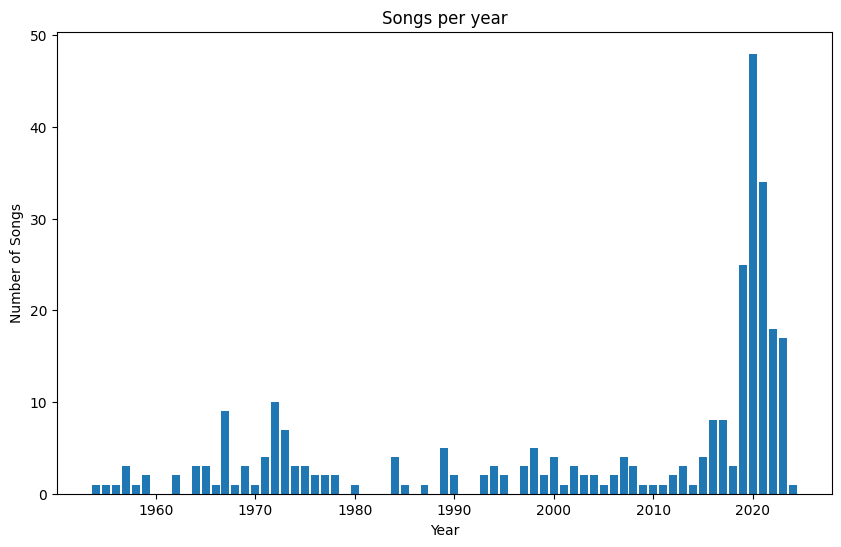

In [18]:
#visualize number of songs (track_name) per year
plt.figure(figsize=(10, 6))
plt.bar(grouped_by_year.index, grouped_by_year['track_name'])
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Songs per year');


In [20]:
print(df["track_album_release_year"].min())

1954


In [21]:
print(df["track_album_release_year"].max())

2024


the playlists are from 2019-2023 and the majority of the songs also seem to be within this time frame. At first glance, it looks like the playlists are supposed to be relevant for the respective years

##Popularity

In [22]:
artist_popularity = df.groupby("track_artist")["artist_popularity"].mean()
artist_popularity.sort_values(ascending=False).head(20)

track_artist
Drake,Rihanna                                   96.0
Billie Eilish                                   96.0
Bad Bunny,Bomba Estéreo                         95.0
Travis Scott,Young Thug,M.I.A.                  94.0
Yng Lvcas,Peso Pluma                            93.0
Kendrick Lamar,Blxst,Amanda Reifer              92.0
Kendrick Lamar                                  92.0
Rihanna                                         92.0
SZA                                             90.0
Dua Lipa,DaBaby                                 88.0
J Balvin,Dua Lipa,Bad Bunny,Tainy               88.0
Luke Combs                                      87.0
J. Cole                                         87.0
Beyoncé                                         87.0
Beyoncé,Kendrick Lamar                          87.0
Daniel Caesar                                   86.0
The Beatles                                     86.0
Harry Styles                                    85.0
JAY-Z,Beyoncé,Childish Gambino,Ou

In [23]:
track_popularity = df.groupby("track_name")["track_popularity"].mean()
track_popularity.sort_values(ascending=False).head(20)

track_name
Snooze                                85.0
Best Part (feat. H.E.R.)              84.0
Brown Eyed Girl                       83.0
Dancing In the Dark                   82.0
Fast Car                              82.0
La Bebe - Remix                       81.0
Ojitos Lindos                         81.0
The Chain - 2004 Remaster             80.0
Could You Be Loved                    80.0
California Love - Original Version    79.0
Levitating (feat. DaBaby)             79.0
(Sittin' On) the Dock of the Bay      78.0
Work                                  77.0
Come Together - Remastered 2009       76.0
Unchained Melody                      76.0
Doo Wop (That Thing)                  75.0
Let's Stay Together                   75.0
Señorita                              75.0
Respect                               74.0
Rhiannon                              74.0
Name: track_popularity, dtype: float64

In [24]:
print("Average Track Popularity: ", track_popularity.mean())
print("Median Track Popularity: ", track_popularity.median())
print("Max Track Popularity: ", track_popularity.max())
print("Min Track Popularity: ", track_popularity.min())

Average Track Popularity:  42.12544169611307
Median Track Popularity:  46.0
Max Track Popularity:  85.0
Min Track Popularity:  0.0


In [25]:
print("Average Artist Popularity: ", artist_popularity.mean())
print("Median Artist Popularity: ", artist_popularity.median())
print("Max Artist Popularity: ", artist_popularity.max())
print("Min Artist Popularity: ", artist_popularity.min())

Average Artist Popularity:  61.48076923076923
Median Artist Popularity:  65.0
Max Artist Popularity:  96.0
Min Artist Popularity:  0.0


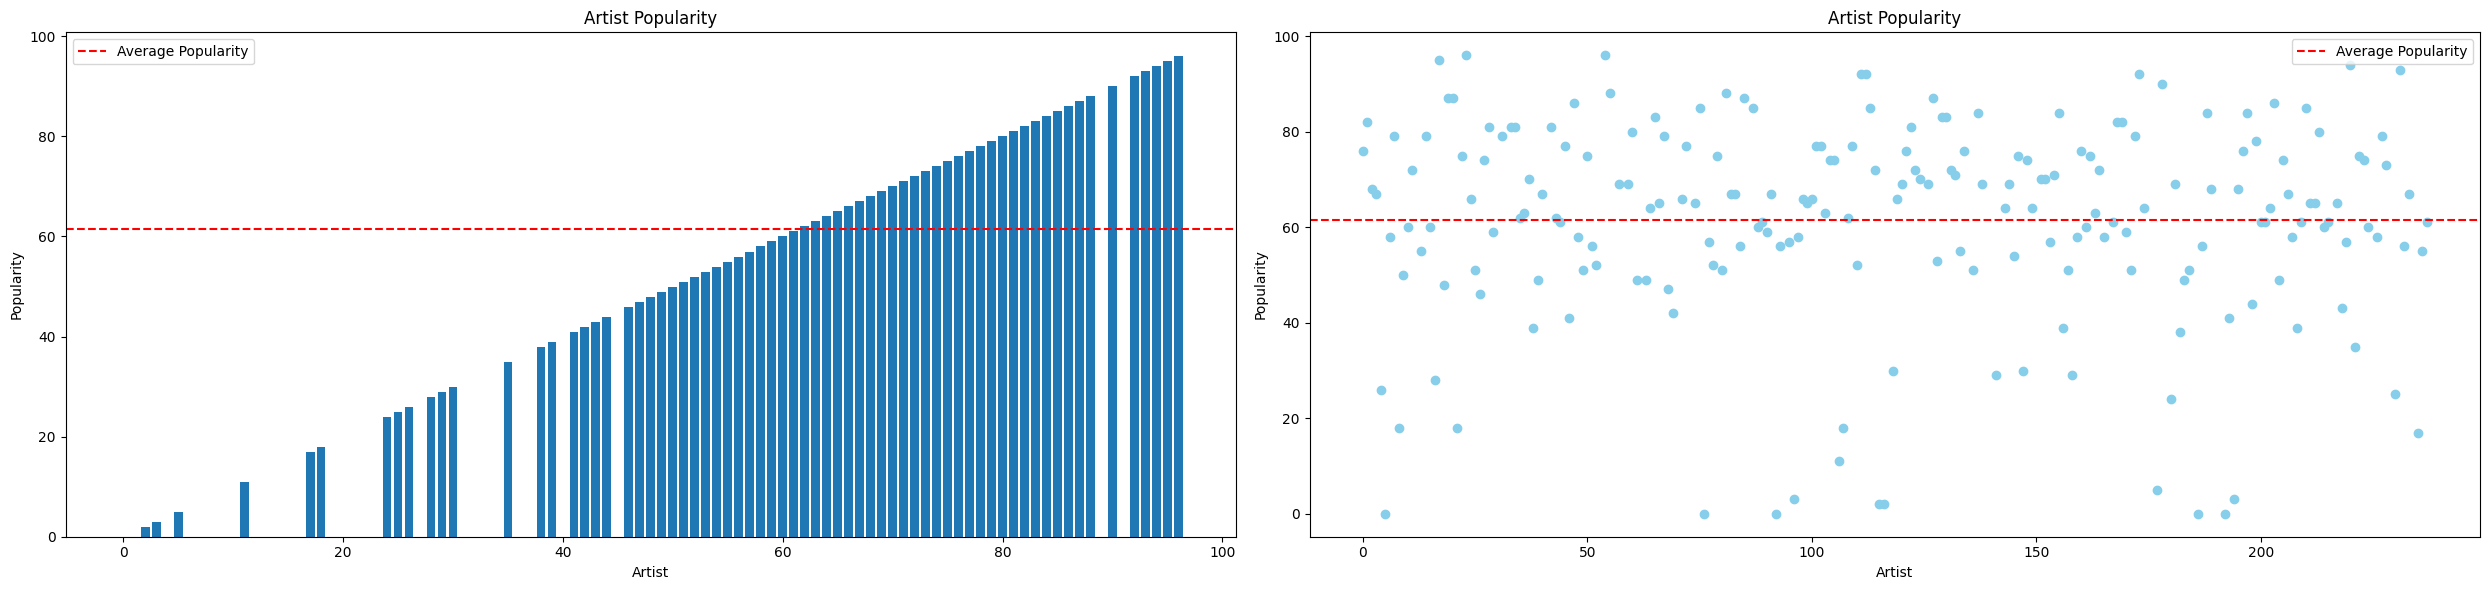

In [26]:
# Set up the figure for Artist Popularity with two subplots (barplot and scatterplot) side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 6))

# Bar Plot on the first subplot
ax1.bar(artist_popularity, artist_popularity, color='#1f77b4')
ax1.axhline(y=artist_popularity.mean(), color='red', linestyle='--', label='Average Popularity')
ax1.set_xlabel('Artist')
ax1.set_ylabel('Popularity')
ax1.set_title('Artist Popularity')
ax1.legend()

# Scatter Plot on the second subplot
ax2.scatter(range(len(artist_popularity)), artist_popularity, color='skyblue')
ax2.axhline(y=artist_popularity.mean(), color='red', linestyle='--', label='Average Popularity')
ax2.set_xlabel('Artist')
ax2.set_ylabel('Popularity')
ax2.set_title('Artist Popularity')
ax2.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

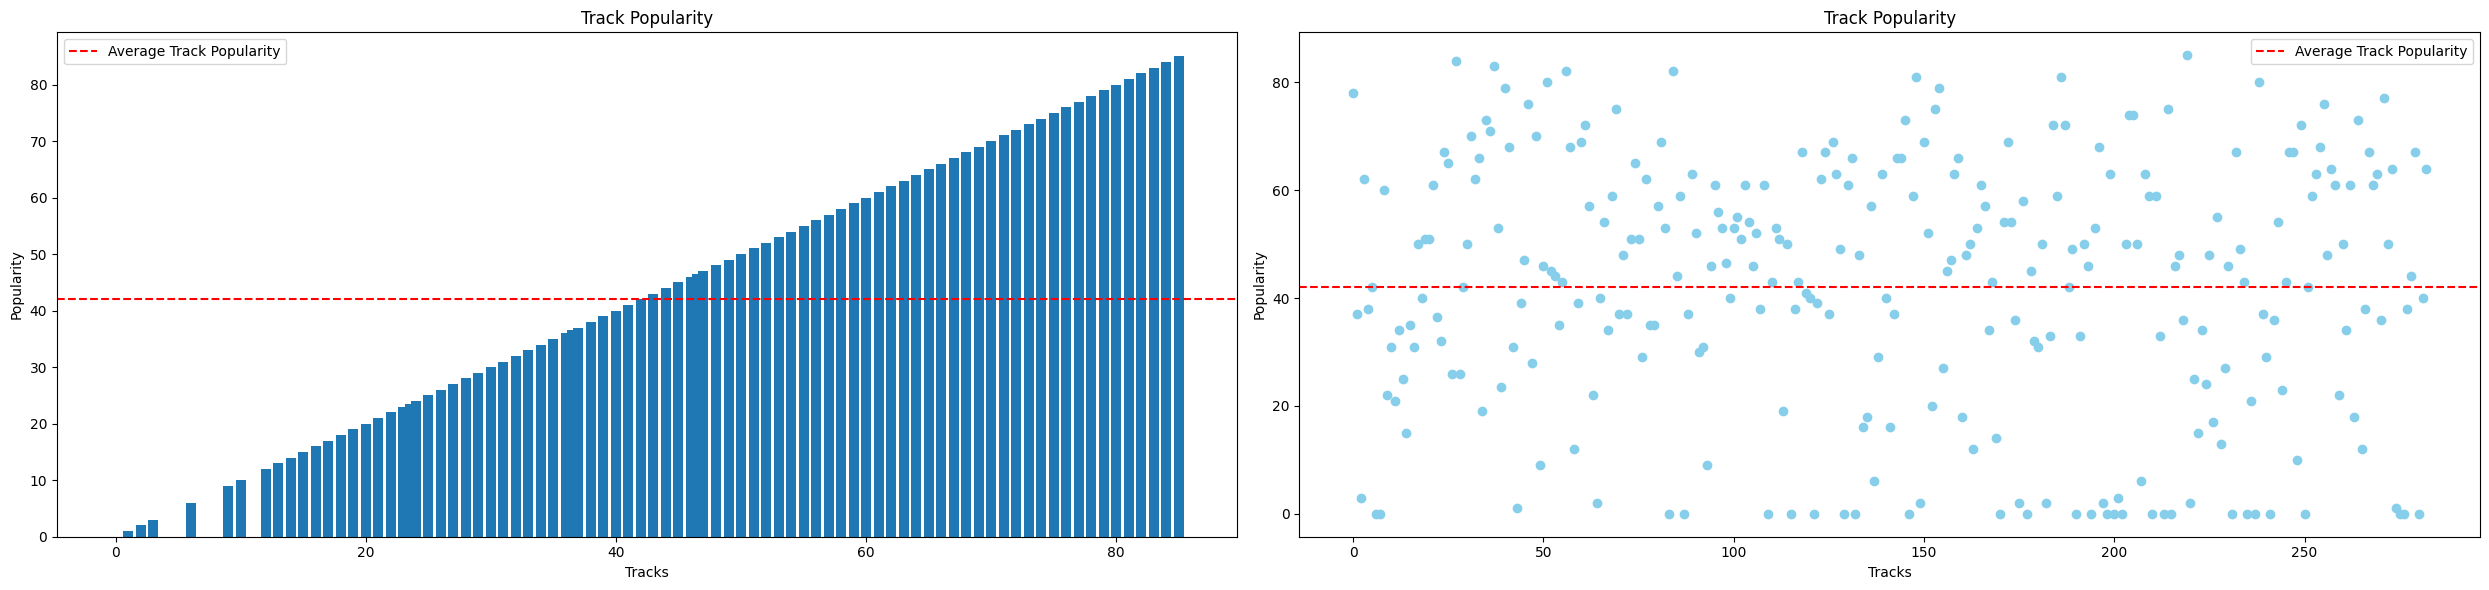

In [27]:
# Set up the figure for Track Popularity with two subplots (barplot and scatterplot) side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 6))

# Bar Plot on the first subplot
ax1.bar(track_popularity, track_popularity, color='#1f77b4')
ax1.axhline(y=track_popularity.mean(), color='red', linestyle='--', label='Average Track Popularity')
ax1.set_xlabel('Tracks')
ax1.set_ylabel('Popularity')
ax1.set_title('Track Popularity')
ax1.legend()

# Scatter Plot on the second subplot
ax2.scatter(range(len(track_popularity)), track_popularity, color='skyblue')
ax2.axhline(y=track_popularity.mean(), color='red', linestyle='--', label='Average Track Popularity')
ax2.set_xlabel('Tracks')
ax2.set_ylabel('Popularity')
ax2.set_title('Track Popularity')
ax2.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

##Track Duration

Does Obama prefer short or long songs?

In [29]:
print(df["duration_min"].mean())

3.872901023890785


In [30]:
print(df["duration_min"].median())

3.66


In [31]:
print(df["duration_min"].min())

1.45


In [32]:
print(df["duration_min"].max())

13.45


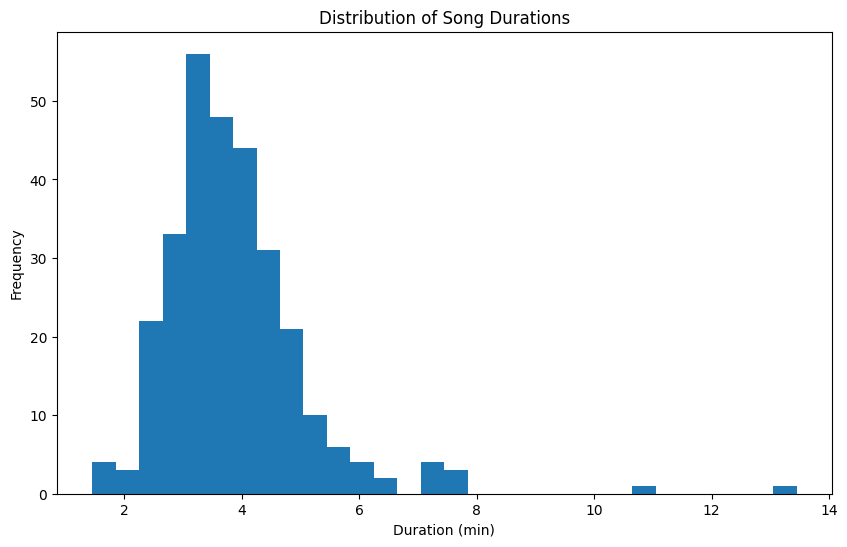

In [33]:
#histogram of duration of songs
plt.figure(figsize=(10, 6))
plt.hist(df['duration_min'], bins=30, color='#1f77b4')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.title('Distribution of Song Durations')
plt.show()

##Music Features

In [34]:
print(df["danceability"].mean())

63.243686006825946


In [35]:
print(df["loudness"].mean())

-8.298191126279864


In [36]:
print(df["valence"].mean())

55.95378839590443


In [37]:
print(df["time_signature"].value_counts())

time_signature
4    266
3     23
1      3
5      1
Name: count, dtype: int64


In [38]:
print(df["mode"].value_counts())

mode
Major    173
minor    107
Minor     13
Name: count, dtype: int64


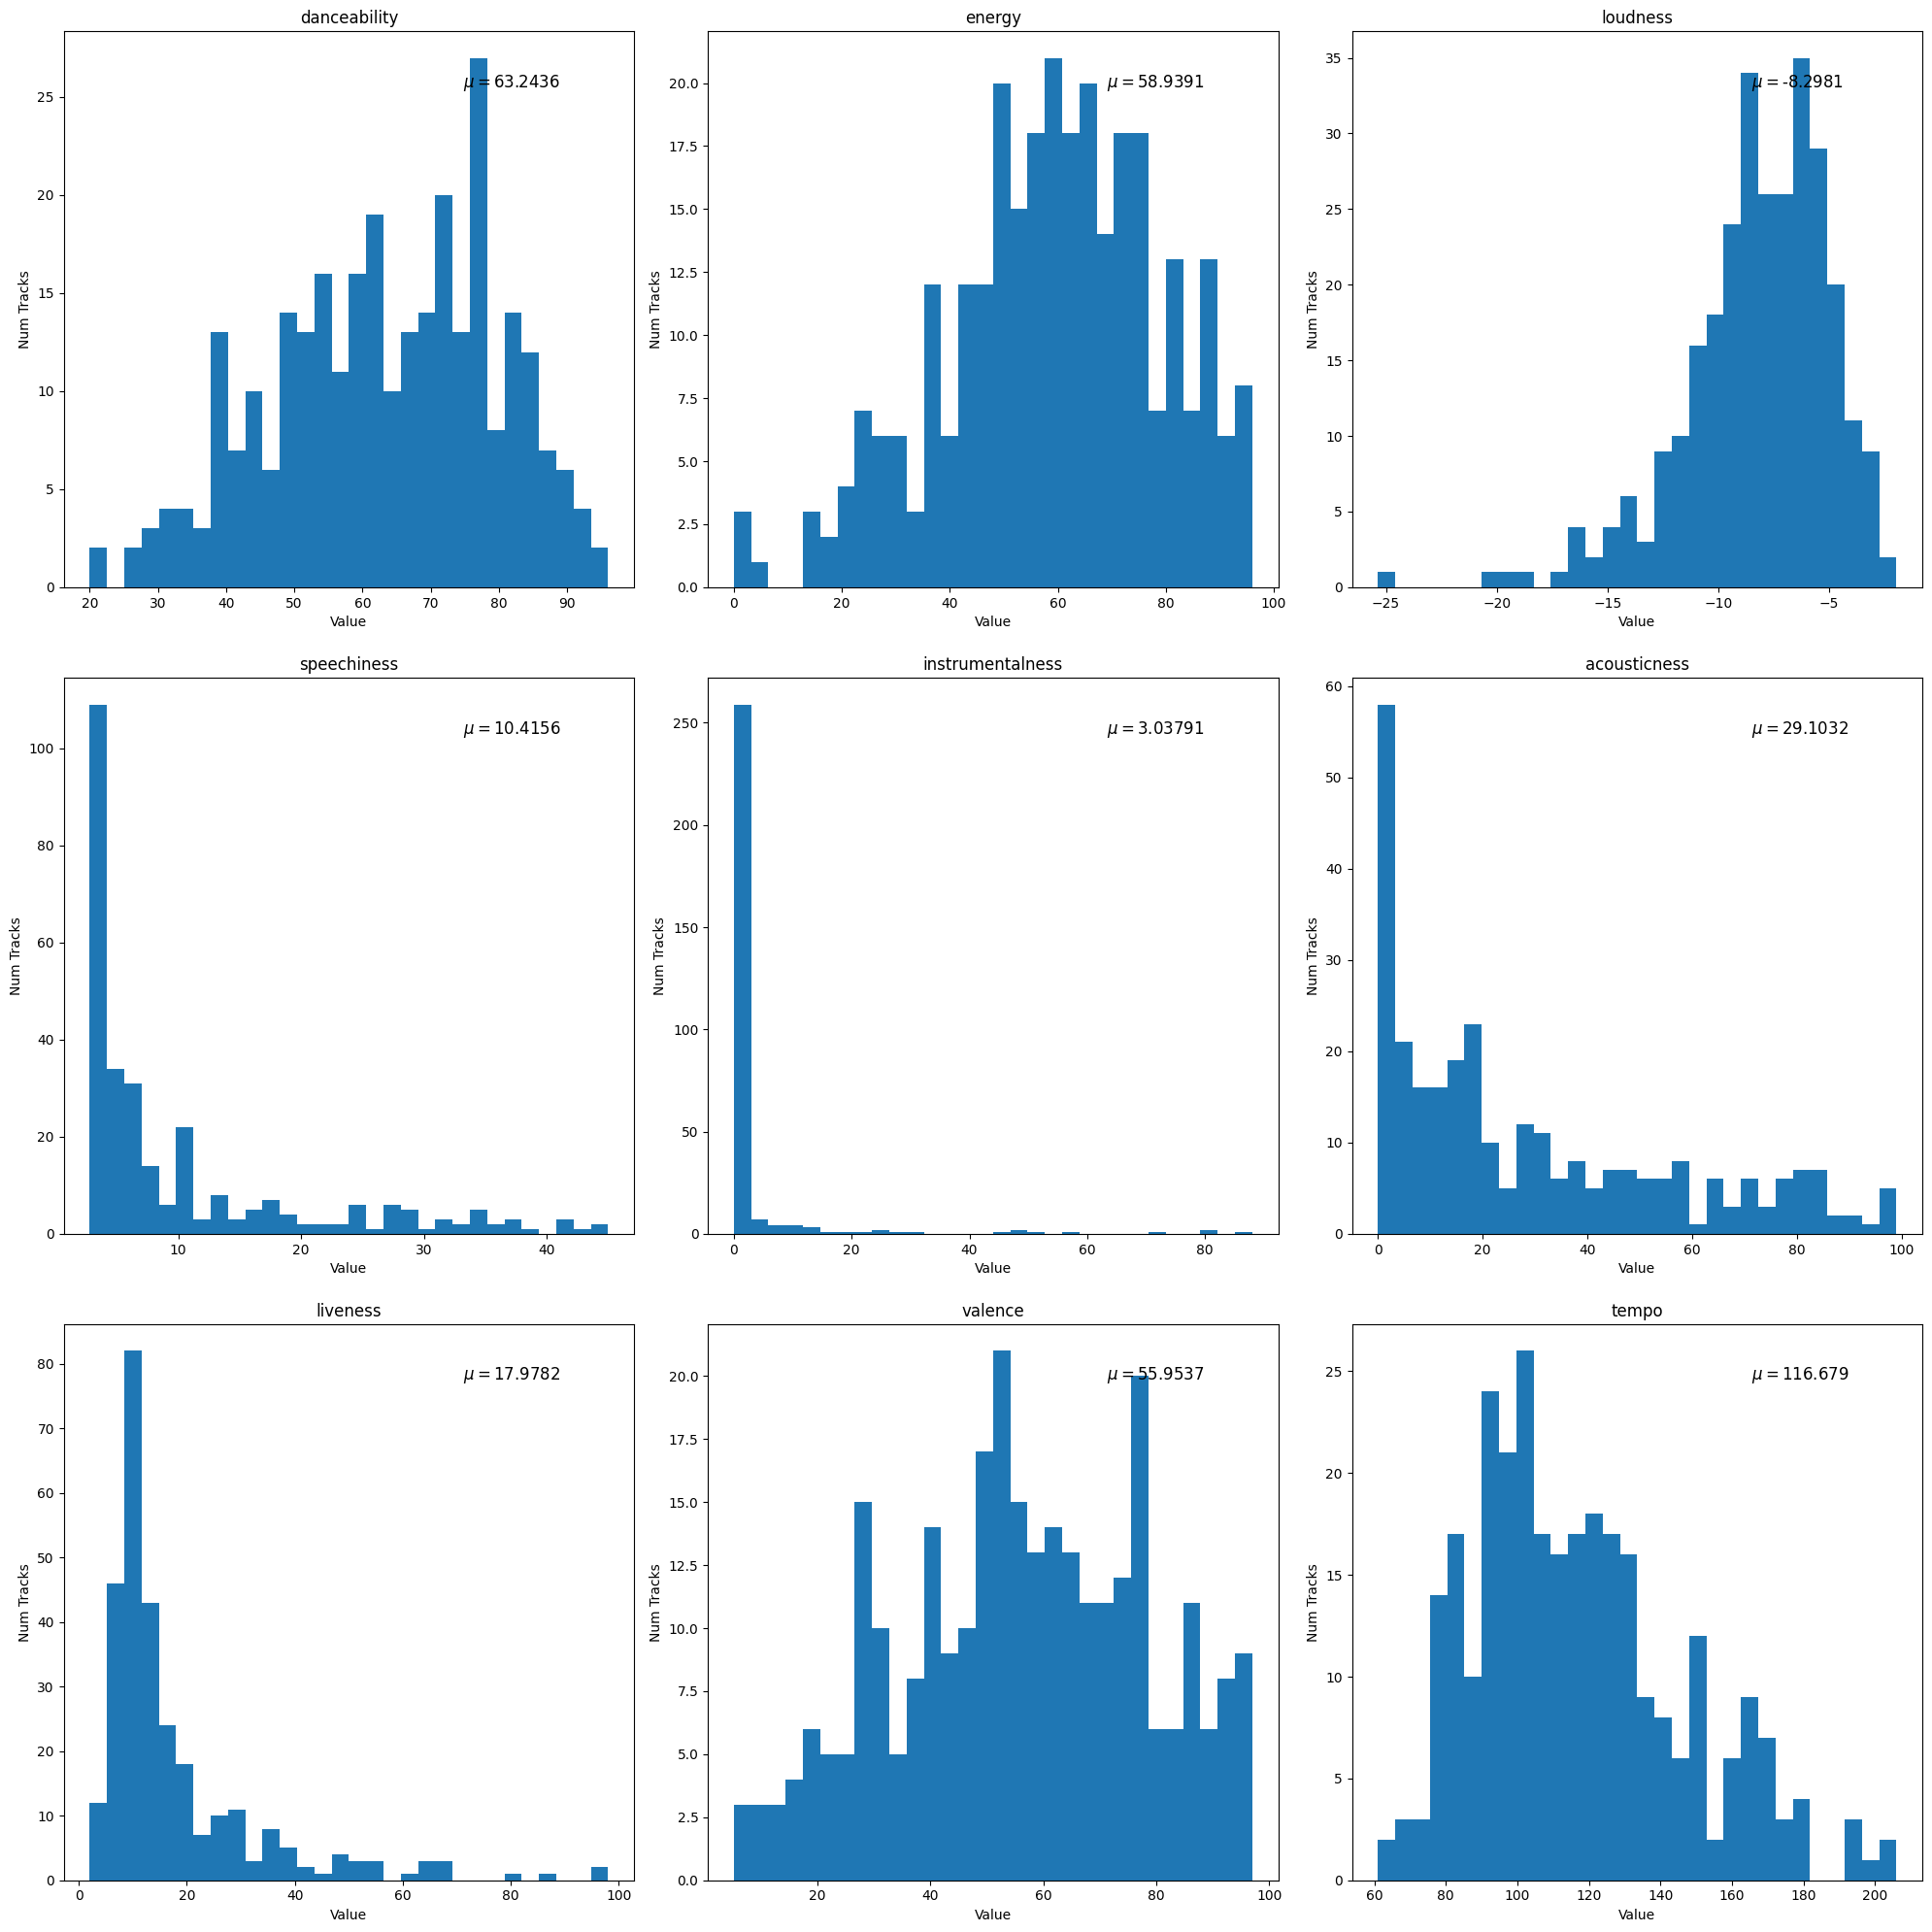

In [39]:
plt.figure(figsize=(20,20))

for i,category in enumerate(['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'acousticness', 'liveness', 'valence', 'tempo']):
    plt.subplot(3, 3, i+1)
    plt.hist(df[category], bins=30)
    plt.text(plt.xlim()[1] - (plt.xlim()[1] - plt.xlim()[0])*0.3,
                plt.ylim()[1]*0.9, r'$\mu=$'+str(df[category].mean())[:7], fontsize=12)
    plt.xlabel('Value')
    plt.ylabel('Num Tracks')
    plt.title(category)

plt.tight_layout(h_pad=2)

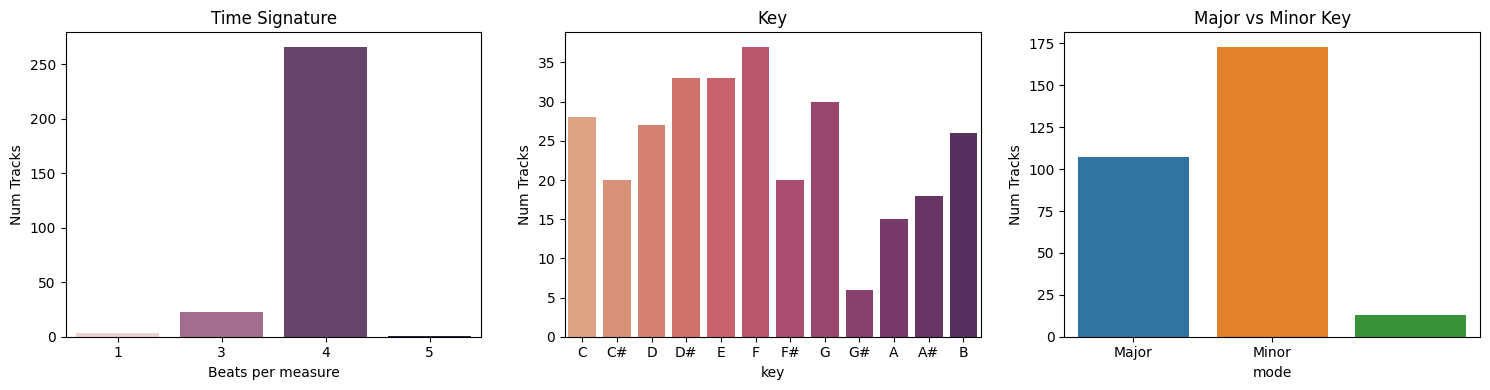

In [43]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.countplot(df, x='time_signature', hue='time_signature', legend=False)
plt.xlabel('Beats per measure')
plt.ylabel('Num Tracks')
plt.title('Time Signature')

plt.subplot(1, 3, 2)
sns.countplot(df, x='key', hue='key', palette='flare', legend=False)
plt.xticks(ticks=plt.xticks()[0], labels=['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.ylabel('Num Tracks')
plt.title('Key')

plt.subplot(1, 3, 3)
sns.countplot(df, x='mode', hue='mode', legend=False)
plt.xticks(ticks=[0, 1], labels=['Major', 'Minor'])  # Set ticks to match labels
plt.ylabel('Num Tracks')
plt.title('Major vs Minor Key')

plt.tight_layout(w_pad=2)

the vast majority of the tracks are in 4/4 time signature but interestingly enough the majority of the tracks are in G major, A major and D minor. About 2/3 of the tracks are in minor key. Maybe this is the reason for a relatively balanced valence of 0,56? Tracks in B major are obviously not very attractive to Obama.
